# COMPUTER ASSIGNMENT 02



## PART 1


**Implement 2D convolution using Python. Complete the following tasks:**
1. Write a 2D convolution function **conv2**. The inputs of this function should be an image array and a filter array, and the output should be the convolved image. Your output image should have a size equal to the original image (similar to the “SAME” option of MATLAB conv2 function). For simplicity, you can assume the filter has an odd length in both horizontal and vertical dimensions and has an origin at the center. The input image to the function is grayscale, i.e. a single channel image. Also you can assume pixel values are zero outside the original input image.
2. Write a main function, which will call the convolution function from **part 1)** to filter a given image with a given filter. The program should show the original image and the filtered image (**make sure to normalize the output image to lie between 0-255**). The program will also calculate and display the magnitude of Fourier transform of the original and filtered image, as well as frequency response of the filter. (In Python, you can use fft2 in numpy to calculate 2D Fourier transform)
3. Use your main program to filter an image with the following three filters:

H1 = [[1,2,1],[2,4,2],[1,2,1]]/16 

H2 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

H3 = [[0,-1,0],[-1,5,-1],[0,-1,0]]


![](Q_FIGURES/F1.png)


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
def conv2(img,kernel):
    # ZERO PADDING THE ORIGINAL IMAGE 
    # so that the convolved image can be obtained by sliding the flipped kernel over the padded image
    
    m = int(kernel.shape[1]/2) # half of kernel width
    n = int(kernel.shape[0]/2) # half of kernal height
    c_pad = np.zeros((img.shape[0],m))# COLUMN PAD
    r_pad = np.zeros((n,img.shape[1]+(2*m)))# ROW PAD
    img_paddedl = np.hstack((c_pad,img)) # pad zeros on the left boundary
    
    ##########################################    [TODO 1]    ##########################################
    # Pad zeros on the other boundaries (right, bottom, top)
    img_paddedr = np.hstack((img_paddedl,c_pad))
    img_paddedt = np.vstack((r_pad,img_paddedr))
    img_paddedb = np.vstack((img_paddedt,r_pad))
    
    # FLIP the filter KERNEL
    ##########################################    [TODO 2]    ##########################################
    # (Hint: using np.flip( ))
    image_kernal = np.flip(img_paddedb)
    
    # Create a new image of zeros with the same size as the input 
    ##########################################    [TODO 3]    ##########################################
    img_final = np.zeros(img.shape)
    img_final = img_final.astype(float)     # Change datatype to float for floating-point calculation
    
    # Perform convolution
    # Hint: you should use loops to go through each pixel of the convolved image and calculate the output
    ##########################################    [TODO 4]    ##########################################
    i= 0
    j= 0
    a= 0
    b= 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for a in range(kernel.shape[0]):
                for b in range(kernel.shape[1]):
                    img_final[i,j] = img_final[i,j] + ((img_paddedb[i+a,j+b])*kernel[a,b])

    # Return convolved image
    return img_final
    

In [ ]:
def main(img,KERNEL):
    
    # Function call to conv2(), passing img and kernel as arguments
    img_output = conv2(img,KERNEL)
    
    # normalize the output to lie between 0-1
    img_output = (img_output-np.min(img_output))/(np.max(img_output)-np.min(img_output))
    
    ##########################################    [TODO 5]    ##########################################
    
    # SHOW ORIGINAL AND FILTERED IMAGE
    plt.figure(1)
    plt.imshow(img,cmap='gray')
    plt.title('Original image')
    plt.figure(2)
    plt.imshow(img_output,cmap='gray')
    plt.title('Filtered image')
    
    # Calculate and display the FFT's of original image, convolved image and filter kernel
    # Use np.fft.fft2()
    fft_original = np.absolute(np.fft.fftshift(np.fft.fft2(img)))
    fft_original_lg = 20*np.log(fft_original+1)
    
    ##########################################    [TODO 6]    ##########################################
    # Calculate and display the FFT of convolved image
    fft_output = np.absolute(np.fft.fftshift(np.fft.fft2(img_output)))
    fft_output_lg = 20*np.log(fft_output+1)
    
    ##########################################    [TODO 7]    ##########################################
    # Calculate and display the FFT of kernel
    fft_filt =  np.absolute(np.fft.fftshift(np.fft.fft2(KERNEL))) # Hint: you should use FFT size equal to the image size for easy comparison
    fft_filt_lg = 20*np.log(fft_filt+1)
     
    f,ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(fft_original_lg,cmap='gray') 
    ax[1].imshow(fft_output_lg,cmap='gray')
    ax[2].imshow(fft_filt_lg,cmap='gray')
    plt.title('Frequency domain representation of the images and kernel')

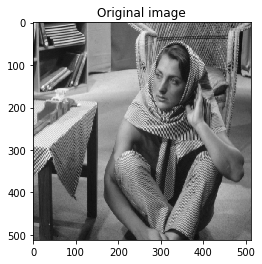

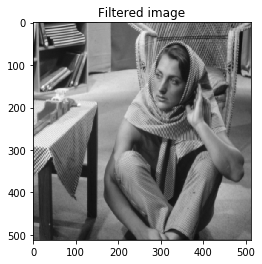

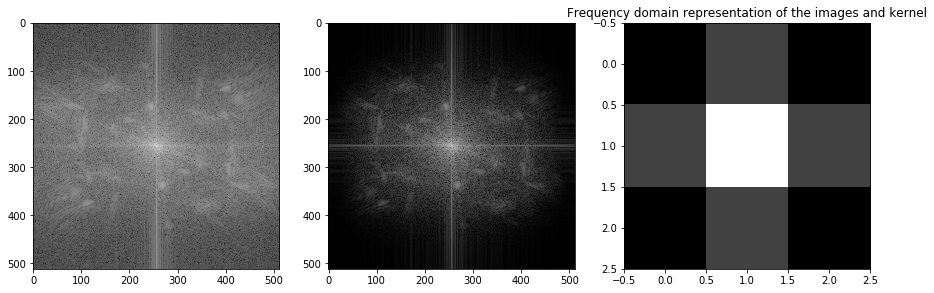

In [ ]:
# function call to main()

# Read in an image. You can choose any image
file_name = 'barbara.jpg'# SPECIFY YOUR IMAGE FILE NAME
img = cv2.imread(file_name,0) # 0 for reading in image as grayscale
img = img.astype(float) # Convert to float before convolution
   

# Define the filter kernel
KERNEL1 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16 # FIRST KERNEL DEFINED
main(img,KERNEL1)




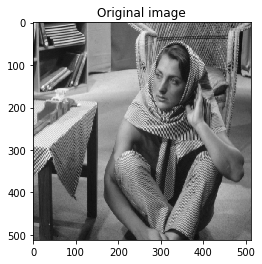

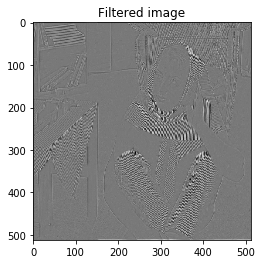

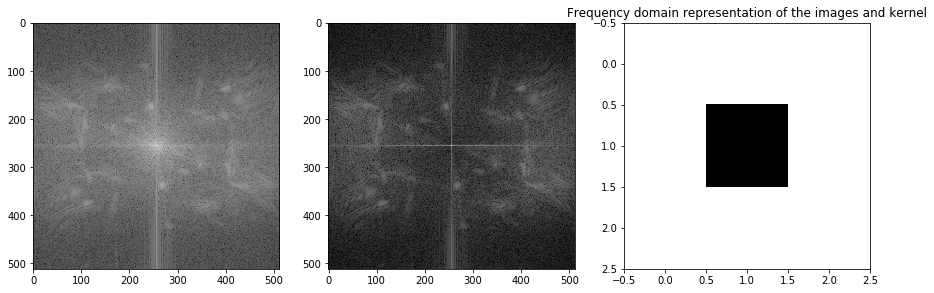

In [ ]:
# Repeat for the other filter kernels
##########################################    [TODO 8]    ##########################################
KERNEL2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # SECOND KERNEL DEFINED
main(img,KERNEL2)



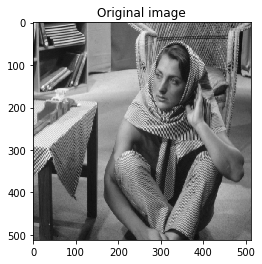

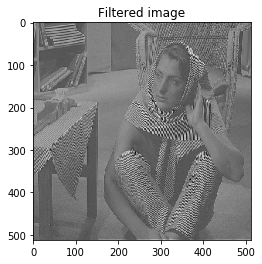

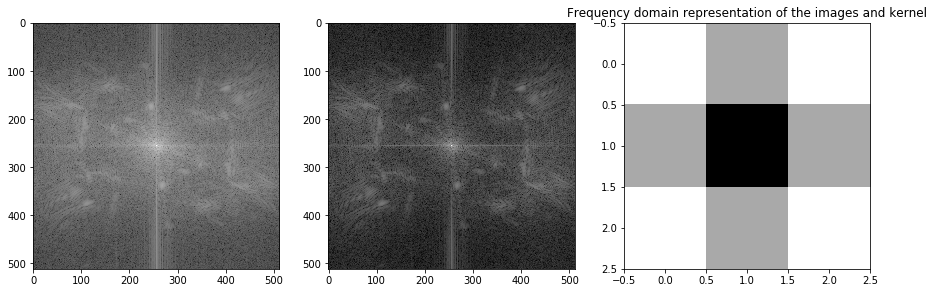

In [ ]:
KERNEL3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) # THIRD KERNEL DEFINED
main(img,KERNEL3)

### DISCUSSION ABOUT RESULTS
- For each filter, discuss the difference between the original and filtered image, both in the spatial and frequency domain and explain how does the filtering effect correlate with the filter and its frequency response.
- **Fill in your response in the cell below**

**FILTER 1:**
This filter acts as a low pass filter. It smoothens the original image by averaging the nearby pixels. It retains the low frequency information and reduces the high frequency information. 

**FILTER 2:**
This filter acts as a high pass filter. It performs edge detection on the original image. Edge detection is performed when the contrast is enhanced between the adjoining areas which is done by the negative and positive values. The brightness of the center pixel is enhanced as compared to the neighbouring pixels. It retains high frequencies and reduces low frequencies. Here, most of the background is not visible, only the edges can be seen.

**FILTER 3:**
This filter also acts as a high pass filter. But since the contrast in the kernal is lesser than the previous filter, it is showing a lighter image background with pronounced edges.

## PART 2

##### **Image noise removal using averaging and Gaussian filters**
1. Create a noisy image by adding zero mean Gaussian random noise to your image
 - In Python, Gaussian noise can be generated by the function np.random.normal($\mu$,$\sigma$,(img.shape))
2. Apply **conv2** to filter the noise-added image using an **average filter of size n x n**, where n is odd
3. Apply **conv2** to filter the noise-added image using a **Gaussian filter of size n x n** (Recall that with Gaussian filter, the filter size and the Gaussian filter parameter σ should satisfy n>=5σ)
 - You have to write a function that constructs a Gaussian filter, with a specified filter size and parameter σ.
 - Guassian function: $\frac{1}{\sqrt{2\pi\sigma^2}}\exp({\frac{-(x^2+y^2)}{2\sigma^2}})$
 - Try two different noise levels (0.01$\times$255 and 0.1$\times$255) and for each noise level different filter sizes (5x5 and 7x7).

**OUTPUT** 

Show the
- original image
- noise-added image
- filtered images for each combination of noise level and filter size.

**If your conv2 function does not seem to work properly, you could use the python function cv2.filter2D for PART2**


In [ ]:
##########################################    [TODO 9]    ##########################################
file_name = 'barbara.jpg'# SPECIFY YOUR IMAGE FILE NAME
img_2 = cv2.imread(file_name,0) # READ THE IMAGE FILE AND ONLY USE THE GRAY VERSION
img_2 = img_2.astype(float) # convert to float

# create zero mean gaussian noise of same size as the image. Noise level 0.01
n1 = np.random.normal(0,0.01,img_2.shape)*255

##########################################    [TODO 10]    ##########################################
# create zero mean gaussian noise. noise level 0.1
n2 = np.random.normal(0,0.1,img_2.shape)*255

# add generated noise to the image. create 2 noisy images with different noise levels
img_n1 = img_2 + n1
img_n2 = img_2 + n2


# create a 5x5 averaging kernel
kernel1_avg = np.ones((5,5))/25

##########################################    [TODO 11]    ##########################################
# create a 7x7 averaging kernel
kernel2_avg = np.ones((7,7))/49


##########################################    [TODO 12]    ##########################################
# Write a function to return a gaussian filter as an np array
# You can assume input to filter_size is odd
def gauss(filter_size, sigma):
    # Hint: first create two coordinate matrices one increment along x-axis, the other increment along y-axis,
    # with the center having coordinate (0,0)
    #      Use np.meshgrid() to do this
    x = np.arange(-filter_size//2,filter_size//2)
    y = np.arange(-filter_size//2,filter_size//2)
    x2d, y2d = np.meshgrid(x,y)
    # Evaluate evaluate the Gaussian function on the x-y coordinate matrices to obtain the gaussian filter matrix
    # See equation above for Gaussian function
    x1 = np.exp(-((x2d**2)+(y2d**2))/2*(sigma**2))
    x2 = np.sqrt(np.pi*2*(sigma**2))
    kernel = x1/x2
    # Divide kernel by the sum of all kernel elements to make DC level to be 1
    kernel = kernel/(np.sum(kernel))
    return kernel


# Create 5x5 and 7x7 Gaussian kernel
kernel1_gauss = gauss(5,1)
kernel2_gauss = gauss(7,1)


Print the Guassian kernels here to make sure their values make sense, and are of correct sizes

In [ ]:
np.set_printoptions(precision=3)
print(kernel1_gauss)
print(kernel2_gauss)

[[2.217e-05 2.700e-04 1.210e-03 1.995e-03 1.210e-03]
 [2.700e-04 3.290e-03 1.474e-02 2.431e-02 1.474e-02]
 [1.210e-03 1.474e-02 6.608e-02 1.089e-01 6.608e-02]
 [1.995e-03 2.431e-02 1.089e-01 1.796e-01 1.089e-01]
 [1.210e-03 1.474e-02 6.608e-02 1.089e-01 6.608e-02]]
[[1.808e-08 5.986e-07 7.292e-06 3.268e-05 5.388e-05 3.268e-05 7.292e-06]
 [5.986e-07 1.982e-05 2.415e-04 1.082e-03 1.784e-03 1.082e-03 2.415e-04]
 [7.292e-06 2.415e-04 2.942e-03 1.318e-02 2.174e-02 1.318e-02 2.942e-03]
 [3.268e-05 1.082e-03 1.318e-02 5.909e-02 9.742e-02 5.909e-02 1.318e-02]
 [5.388e-05 1.784e-03 2.174e-02 9.742e-02 1.606e-01 9.742e-02 2.174e-02]
 [3.268e-05 1.082e-03 1.318e-02 5.909e-02 9.742e-02 5.909e-02 1.318e-02]
 [7.292e-06 2.415e-04 2.942e-03 1.318e-02 2.174e-02 1.318e-02 2.942e-03]]


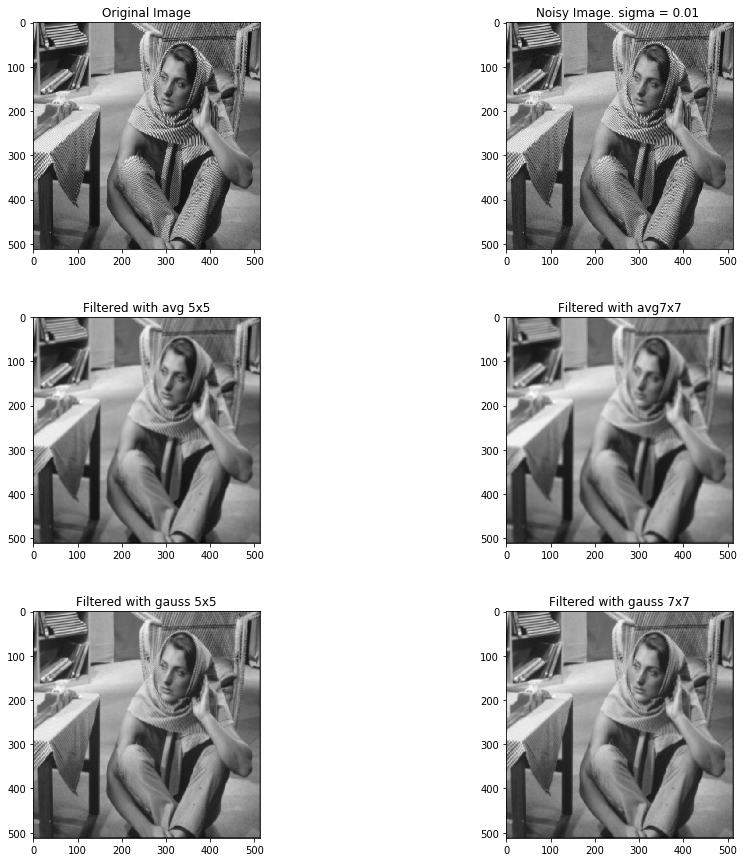

#################################################################


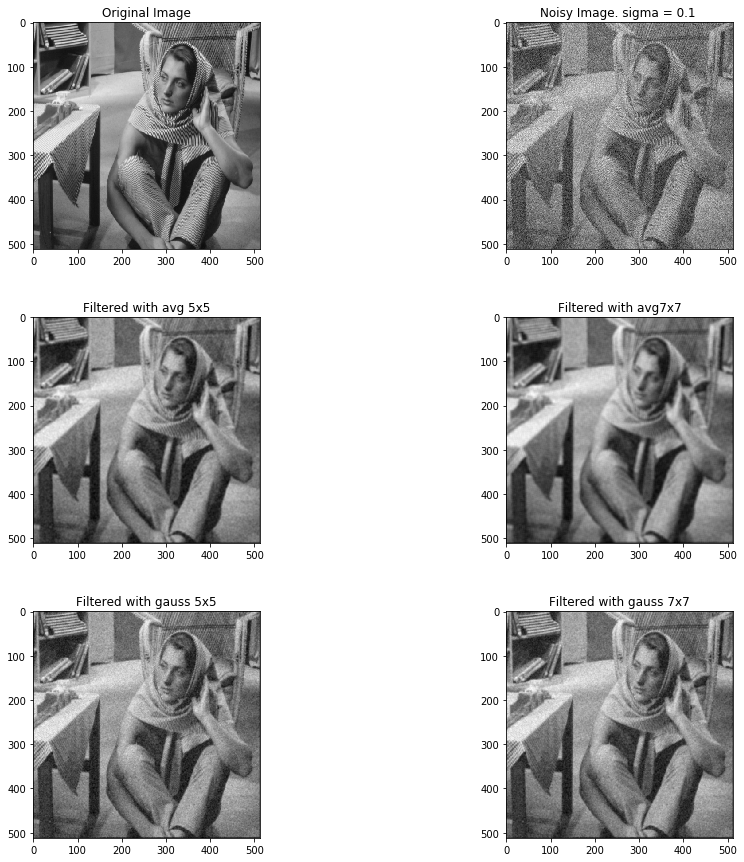

#################################################################


In [ ]:
# function call to conv2 with 5x5 averaging filter. noise level 0.01
output_n1_avg1 = conv2(img_n1,kernel1_avg)

##########################################    [TODO 13]    ##########################################
# function call to conv2 with 7x7 averaging filter. noise level 0.01
output_n1_avg2 = conv2(img_n1,kernel2_avg)

# function call to conv2 with 5x5 gaussian filter. noise level 0.01
output_n1_gauss1 = conv2(img_n1,kernel1_gauss) 
output_n1_gauss2 = conv2(img_n1,kernel2_gauss)

# Repeat for noisy image with noise level 0.1
##########################################    [TODO 14]    ##########################################
output_n2_avg1 = conv2(img_n2,kernel1_avg)
output_n2_avg2 = conv2(img_n2,kernel2_avg)
output_n2_gauss1 = conv2(img_n2,kernel1_gauss)
output_n2_gauss2 = conv2(img_n2,kernel2_gauss)


##########################################    [TODO 15]    ##########################################
# PLOT THE INPUT, THE NOISY IMAGE AND THE OUTPUT OBTAINED BY DENOISING THE IMAGE WITH NOISE(SIGMA=0.01)
f,ax = plt.subplots(3,2,figsize = (15,15))
ax[0,0].imshow(img_2,cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,1].imshow(img_n1,cmap='gray')
ax[0,1].set_title('Noisy Image. sigma = 0.01 ')
ax[1,0].imshow(output_n1_avg1,cmap='gray')
ax[1,1].imshow(output_n1_avg2,cmap='gray')
ax[2,0].imshow(output_n1_gauss1,cmap='gray')
ax[2,1].imshow(output_n1_gauss2,cmap='gray')
ax[1,0].set_title('Filtered with avg 5x5')
ax[1,1].set_title('Filtered with avg7x7')
ax[2,0].set_title('Filtered with gauss 5x5')
ax[2,1].set_title('Filtered with gauss 7x7')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
print('#################################################################')


# PLOT THE INPUT, THE NOISY IMAGE AND THE OUTPUT OBTAINED BY DENOISING THE IMAGE WITH NOISE(SIGMA=0.1)
f,ax = plt.subplots(3,2,figsize = (15,15))
ax[0,0].imshow(img_2,cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,1].imshow(img_n2,cmap='gray')
ax[0,1].set_title('Noisy Image. sigma = 0.1 ')
ax[1,0].imshow(output_n2_avg1,cmap='gray')
ax[1,1].imshow(output_n2_avg2,cmap='gray')
ax[2,0].imshow(output_n2_gauss1,cmap='gray')
ax[2,1].imshow(output_n2_gauss2,cmap='gray')
ax[1,0].set_title('Filtered with avg 5x5')
ax[1,1].set_title('Filtered with avg7x7')
ax[2,0].set_title('Filtered with gauss 5x5')
ax[2,1].set_title('Filtered with gauss 7x7')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
print('#################################################################')



### DISCUSSION ABOUT THE RESULTS
**Comment on for each noise level, which filter size is best for each filter and how does the two filters compare in their noise removal capability.**


A larger kernal would always be a good option in terms of removing the noise as it would provide maximum noise suppression, but it would involve the risk of blurring the edges more. We need a kernal that would find a balance between retaining the image as close to the original as possible and also remove the noise as much as possible.

Talking about the type of filters used, averaging filter seems to have a good output over noise removal in the spatial domain. But it is not a good filter for a good performance in the frequency domain. Where as, Gaussian filter shows a good performance in the frequency domain.

**NOISE LEVEL - SIGMA = 0.01:**
Here, the noise being not too much, either of the two sizes of filters can be used if the gaussian filter is used. The resulting images also don't show much of a difference. But in case of the averaging filter, the 5x5 shows a better noise reduction. 

**NOISE LEVEL - SIGMA = 0.1:**
Here, the noise level being quite a lot, a larger sized filter would be preferred. This can also be seen in the resulting images as the 7x7 filter gives more of a smoothened out,defined image than the 5x5 filter. But too big of a filter might blur the image.


In both the noise cases, Gaussian filter outperforms the averaging filter in terms noise removal.